<h1 align="center"> What Online Video Game Reviews Can Tell Us? </h1>
<h2 align="center"> An Exploratory Analysis of Dota 2 Reviews</h2>
<h3 align="center"> By: Langtao Chen </h3>
<h3 align="center"> Last Update: 12/29/2017 </h3>

# 1. Introduction

Dota 2 is a free-to-play multiplayer online video game developed by Valve Corporation. It is the one of the most popular games on the Steam platform (http://store.steampowered.com/). As the dota2 website (http://www.dota2.com/play/) describes:

"Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own."

<img src='dota_2_official_9.jpg'>

Steam video game players not only play the games, but also review the games they have played. A player can share his/her experiences or opinions about the game. The Steam platform also allows the player to thumb up or thumb down a game. Other online players can reply to the game reviews and assess the game reviews are useful or not. So, the Steam video game review system includes online communication mechanism to support online discourse, as well as quality control system to evaluate the quality (i.e., usefulness) of the reviews.

Online video game reviews are not only a form of game player participation and engagement. More importantly, such game reviews, like product reviews on Amazon, are a type of online word-of-mouth that can help shape the evolving trajectory of online video games. Useful reviews can be further considered for future edition development to better improve game players' gaming experiences.

In this project, we want to conduct an exploratory study on the dota 2 reviews on the Steam platform. Specifically, we want to answer the following research questions:

- What do the dota 2 online reviews look like?
- What factors contribute to useful game reviews?
- How can we build a predictive model to estimate whether a review is recommended or not?

# 2. Data

The dataset was downloaded from the following github link:

https://github.com/mulhod/steam_reviews/blob/master/data/Dota_2.jsonlines

The original dataset was scraped from Steam website (http://store.steampowered.com/).

In this project, we choose to use pandas data frame to organize the dataset. First, let's import the pandas module into the current environment.

In [1]:
# Import modules
import pandas as pd

In [2]:
type(pd)

module

As the dataset is stored in a jsonlines files, we can call the read_json() method in the pandas module to read the data into a data frame.

In [3]:
# Read in data
dat = pd.read_json('Dota_2.jsonlines', lines=True)

In [4]:
type(dat)

pandas.core.frame.DataFrame

Let's show the information of the data frame.

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 27 columns):
profile_url                        9720 non-null object
num_guides                         9720 non-null int64
num_found_unhelpful                9720 non-null int64
date_posted                        9720 non-null object
orig_url                           9720 non-null object
date_updated                       1407 non-null object
friend_player_level                8450 non-null float64
num_reviews                        9720 non-null int64
total_game_hours_last_two_weeks    9720 non-null float64
num_workshop_items                 9720 non-null int64
num_groups                         7714 non-null float64
num_games_owned                    9720 non-null int64
num_voted_helpfulness              9720 non-null int64
username                           9720 non-null object
num_comments                       9720 non-null int64
num_badges                         8449 non-null float64


In [6]:
dat.head(1).transpose()

,0
profile_url,http://steamcommunity.com/id/freddanorsk
num_guides,0
num_found_unhelpful,478
date_posted,"Nov 13, 2014, 10:08AM"
orig_url,http://steamcommunity.com/app/570/homecontent/...
date_updated,None
friend_player_level,19
num_reviews,18
total_game_hours_last_two_weeks,20.4
num_workshop_items,0


As shown above, the data frame contains 9720 observations (rows) and 27 variables (columns). We can notice that some variables (date_updated, found_helpful_percentage, friend_player_level, num_badges, num_friends, and num_groups) have missing values (shown as NaN in the data frame).

Let's use the apply() method to apply an anonymous lambda function along input axis of DataFrame to get the number of missing values for each variable.

In [7]:
dat.apply(lambda x: sum(x.isnull()), axis=0)

profile_url                           0
num_guides                            0
num_found_unhelpful                   0
date_posted                           0
orig_url                              0
date_updated                       8313
friend_player_level                1270
num_reviews                           0
total_game_hours_last_two_weeks       0
num_workshop_items                    0
num_groups                         2006
num_games_owned                       0
num_voted_helpfulness                 0
username                              0
num_comments                          0
num_badges                         1271
review_url                            0
review                                0
num_friends                        1305
total_game_hours                      0
num_found_funny                       0
steam_id_number                       0
num_screenshots                       0
rating                                0
found_helpful_percentage           3459


Let's try to show same samples of the dataset. We can use the head() function.

In [8]:
dat.head(n=4)

,profile_url,num_guides,num_found_unhelpful,date_posted,orig_url,date_updated,friend_player_level,num_reviews,total_game_hours_last_two_weeks,num_workshop_items,...,review,num_friends,total_game_hours,num_found_funny,steam_id_number,num_screenshots,rating,found_helpful_percentage,achievement_progress,num_found_helpful
0,http://steamcommunity.com/id/freddanorsk,0,478,"Nov 13, 2014, 10:08AM",http://steamcommunity.com/app/570/homecontent/...,None,19.0,18,20.4,0,...,This game taught me about the diversity of cul...,108.0,599.4,1,freddanorsk,295,Recommended,0.920107,{'num_achievements_percentage': 0.556886227544...,5505
1,http://steamcommunity.com/id/Chromebot,4,190,"Sep 27, 2014, 7:32PM",http://steamcommunity.com/app/570/homecontent/...,"Jan 30, 2015, 10:52PM",13.0,18,45.6,0,...,Side effects include: -Hatred of other humans ...,44.0,2687.8,1,Chromebot,719,Recommended,0.927702,{'num_achievements_percentage': 0.102272727272...,2438
2,http://steamcommunity.com/id/grizzt,0,371,"Oct 8, 2014, 11:50AM",http://steamcommunity.com/app/570/homecontent/...,None,NaN,0,0.2,0,...,It's like roulette; fun until it turns into Ru...,NaN,947.3,1,grizzt,0,Recommended,0.918640,"{'num_achievements_percentage': None, 'num_ach...",4189
3,http://steamcommunity.com/profiles/76561197996...,0,1330,"Dec 16, 2013, 7:37PM",http://steamcommunity.com/app/570/homecontent/...,None,20.0,14,5.9,0,...,"Causes anxiety problems, low self esteem, Tour...",280.0,2204.0,1,76561197996929994,134,Recommended,0.911001,{'num_achievements_percentage': 0.707692307692...,13614


The head() function is not really very helpful, as there are too many columns. To show the complete structure, we can simply show two transposed rows (in this case, the 1st two observations).

In [9]:
dat.head(2).transpose()

,0,1
profile_url,http://steamcommunity.com/id/freddanorsk,http://steamcommunity.com/id/Chromebot
num_guides,0,4
num_found_unhelpful,478,190
date_posted,"Nov 13, 2014, 10:08AM","Sep 27, 2014, 7:32PM"
orig_url,http://steamcommunity.com/app/570/homecontent/...,http://steamcommunity.com/app/570/homecontent/...
date_updated,None,"Jan 30, 2015, 10:52PM"
friend_player_level,19,13
num_reviews,18,18
total_game_hours_last_two_weeks,20.4,45.6
num_workshop_items,0,0


Now, let summarize the meaning of each variable based on our understanding.

- **achievement_progress**: user's game achievement progress
- **date_posted**: date the review is posted
- **date_updated**: date the review is updated
- **found_helpful_percentage**: percentage of votes that the review is found useful
- **friend_player_level**: the level of the user's friend players
- **num_badges**: number of badges the user has
- **num_comments**: number of comments responded to the review
- **num_found_funny**: times the review is found funny
- **num_found_helpful**: times the review is found helpful
- **num_found_unhelpful**: times the review is found unhelpful
- **num_friends**: number of friends the user has
- **num_games_owned**: number of games the user owns
- **num_groups**: number of groups the user joins
- **num_guides**: number of guides the user has posted
- **num_reviews**: number of reviews the user has posted
- **num_screenshots**: number of screenshots the user has
- **num_voted_helpfulness**: number of helpful votes the user has received
- **num_workshop_items**: number of workshop items the user has
- **orig_url**: the original url where the review is scraped
- **profile_url**: the url of the user's profile
- **rating**: rating status of the review, either "Recommended" or "Not Recommended"
- **review**: the review text
- **review_url**: the url of the review
- **steam_id_number**: the user id who posted the review
- **total_game_hours**: total game hours of the user
- **total_game_hours_last_two_weeks**: total game hours of the user in the last two weeks
- **username**: the user name who posted the review

We notice that the column found_helpful_percentage is simply calculated as:

found_helpful_percentage = num_found_helpful/(num_found_helpful + num_found_unhelpful)

This can be verified by calculate the percentage for the 1st observation.

In [10]:
5505/(5505+478)

0.9201069697476183

Let's show the summary statistics of the dataset. Notice that only numeric columns have the summary statistics.

In [11]:
# Get the summary statistics
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_guides,9720.0,0.434979,3.117728,0.000,0.00,0.0,0.000,145.0
num_found_unhelpful,9720.0,14.394444,91.700310,0.000,0.00,0.0,0.000,1330.0
friend_player_level,8450.0,13.450533,15.663591,0.000,4.00,10.0,17.000,475.0
num_reviews,9720.0,4.554424,11.129175,0.000,1.00,1.0,4.000,266.0
total_game_hours_last_two_weeks,9720.0,22.134414,34.707354,0.000,0.00,7.2,32.600,325.1
num_workshop_items,9720.0,0.290947,3.391236,0.000,0.00,0.0,0.000,191.0
num_groups,7714.0,17.259398,46.430237,1.000,3.00,6.0,15.000,1412.0
num_games_owned,9720.0,70.657099,165.792327,0.000,2.00,16.0,76.000,3408.0
num_voted_helpfulness,9720.0,142.079321,988.947794,0.000,0.00,2.0,4.000,14944.0
num_comments,9720.0,2.544959,14.278060,0.000,0.00,0.0,1.000,260.0


The num_found_helpful has a wide range from 0 to 13614. 75% values are in the narrow range of [0,3]. That basically indicates the power-like distribution of this variable: many Dota 2 game reviews are not in good quality, while only a few reviews received many votes of helpfulness.

# 3. Data Exploration

## 3.1. Data Transformation

we notice that the date_posted and date_posted columns are represented as strings. It's better to represent them as datatime objects. Let's transform them by calling the to_datetime() function in the pandas module.

In [12]:
dat['date_posted'] = pd.to_datetime(dat['date_posted'])

dat['date_updated'] = pd.to_datetime(dat['date_updated'])

In [13]:
# Describe the date_posted column
dat['date_posted'].describe()

count                    9720
unique                   8472
top       2014-11-30 16:15:00
freq                       28
first     2011-08-10 11:32:00
last      2015-07-17 14:51:00
Name: date_posted, dtype: object

We can find that the reviews were posted the the period from 8/10/2014 to 7/17/2015.

In [14]:
# Describe the date_updated column
dat['date_updated'].describe()

count                    1407
unique                   1161
top       2015-01-30 22:52:00
freq                       28
first     2013-11-25 10:34:00
last      2015-07-17 11:02:00
Name: date_updated, dtype: object

We can find that only 1407 reviews have update datetime. That means only 1407 reviews have been updated after being initally posted. Most reviews have not been updated.

In many cases, we may need to know the year, month, day of week information of the review post date. These columns may be helpful in visualizing the data as well as regression or predicitive analyses. Let's create seperate variables.

In [15]:
# Create post_year column
dat['post_year'] = dat['date_posted'].dt.year
# Create post_month column
dat['post_month'] = dat['date_posted'].dt.month
# Create post_dayofweek column (0=Mon, 6=Sun)
dat['post_dayofweek'] = dat['date_posted'].dt.dayofweek

Another issue of data representation is the rating column. It is a string and thus not convinient for data analysis. We can create a dummy variable "recommend" to represent the user rating.

In [16]:
dat['rating'].value_counts()

Recommended        9163
Not Recommended     557
Name: rating, dtype: int64

In [17]:
dat['recommend'] = dat['rating'].replace(to_replace=['Recommended','Not Recommended'],value=[1,0])

In [18]:
# Show summary statistics
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_guides,9720.0,0.434979,3.117728,0.000,0.00,0.0,0.000,145.0
num_found_unhelpful,9720.0,14.394444,91.700310,0.000,0.00,0.0,0.000,1330.0
friend_player_level,8450.0,13.450533,15.663591,0.000,4.00,10.0,17.000,475.0
num_reviews,9720.0,4.554424,11.129175,0.000,1.00,1.0,4.000,266.0
total_game_hours_last_two_weeks,9720.0,22.134414,34.707354,0.000,0.00,7.2,32.600,325.1
num_workshop_items,9720.0,0.290947,3.391236,0.000,0.00,0.0,0.000,191.0
num_groups,7714.0,17.259398,46.430237,1.000,3.00,6.0,15.000,1412.0
num_games_owned,9720.0,70.657099,165.792327,0.000,2.00,16.0,76.000,3408.0
num_voted_helpfulness,9720.0,142.079321,988.947794,0.000,0.00,2.0,4.000,14944.0
num_comments,9720.0,2.544959,14.278060,0.000,0.00,0.0,1.000,260.0


## 3.2. Quality of Reviews

Show the unique values of the rating column.

In [19]:
dat.rating.value_counts()

Recommended        9163
Not Recommended     557
Name: rating, dtype: int64

Draw the histograms of the column "found_helpful_percentage" and "number_found_helpful".

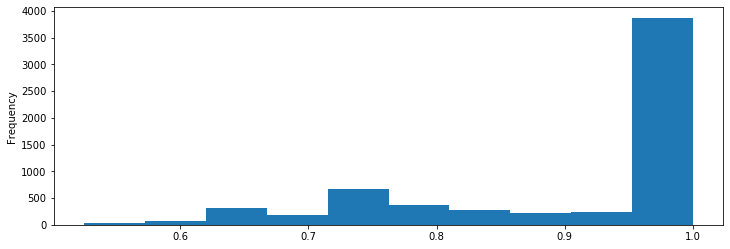

In [20]:
# Use matplotlib to visualize the data
import matplotlib.pyplot as plt

#Show plot in jupyter notebook
%matplotlib inline

dat['found_helpful_percentage'].plot.hist(figsize=(12,4))

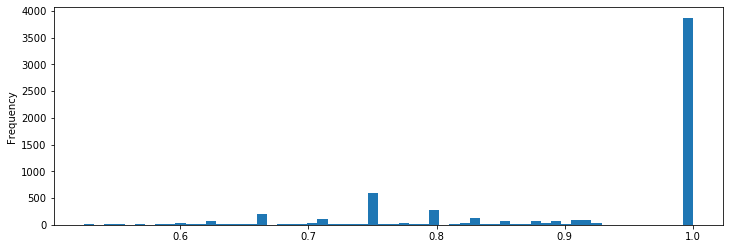

In [21]:
dat['found_helpful_percentage'].plot.hist(bins=60, figsize=(12,4))

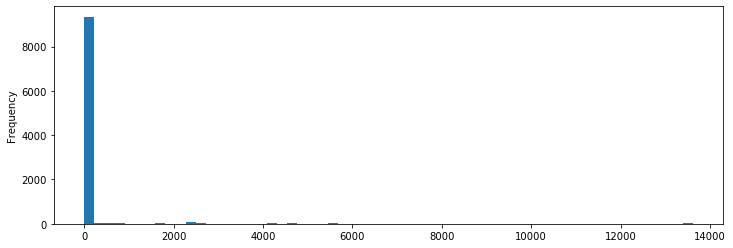

In [22]:
dat['num_found_helpful'].plot.hist(bins=60, figsize=(12,4))

The histogram of num_found_helpful have some very large values. Let's just check the distribution of num_found_helpful in a smaller range, say [0,100].

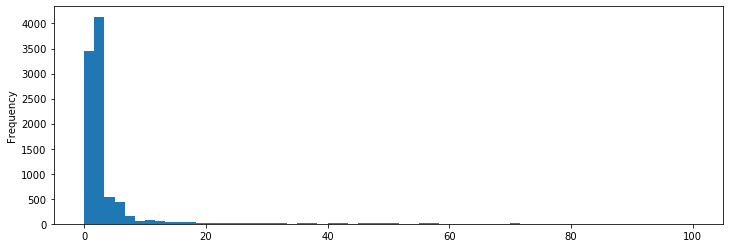

In [23]:
dat[dat.num_found_helpful<=100]['num_found_helpful'].plot.hist(bins=60, figsize=(12,4))

Among 9720 dota 2 reviews, 9163 reviews are recommended, while 557 reviews are not recommended. Most reviews have a high percentage of being found helpful. We notice that num_found_helpful and found_helpful_percentage are distributed with high skewness.

## 3.3. Reviews Across Time

### 3.3.1. Number of Reviews Across Time

First, check the reviews by post year.

In [24]:
# Group by post year
dat_by_year = dat.groupby('post_year')

# Size of the grouped dataset
dat_by_year.size()

post_year
2011      27
2012     210
2013    1094
2014    7228
2015    1161
dtype: int64

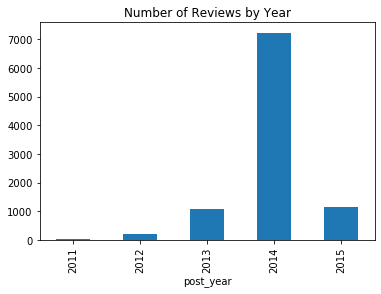

In [25]:
# Plot the number of reviews per year
dat_by_year.size().plot(kind = 'bar', title = 'Number of Reviews by Year')

Although the latest reviews were posted in July 2015, year 2014 see the highest number of reviews posted.

Then, check the reviews by month.

In [26]:
# Group by post month
dat_by_month = dat.groupby('post_month')

# Size of the grouped dataset
dat_by_month.size()

post_month
1      860
2      705
3      565
4      497
5      724
6     1027
7      723
8      930
9      811
10     777
11     893
12    1208
dtype: int64

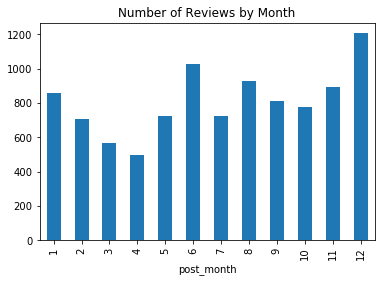

In [27]:
# Plot the number of reviews per month
dat_by_month.size().plot(kind = 'bar', title = 'Number of Reviews by Month')

Summar and winter see more reviews posted. Maybe many dota 2 players are students and they tend to post more reviews in school breaks.

Next, check the reviews by day of week.

In [28]:
# Group by post day of week
dat_by_dayofweek = dat.groupby('post_dayofweek')

# Size of the grouped dataset
dat_by_dayofweek.size()

post_dayofweek
0    1360
1    1334
2    1413
3    1411
4    1408
5    1379
6    1415
dtype: int64

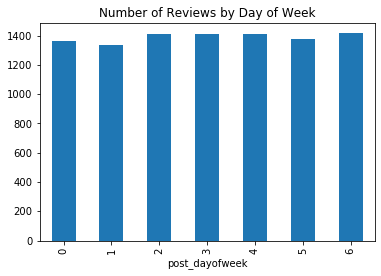

In [29]:
# Plot the number of reviews per day of week
dat_by_dayofweek.size().plot(kind = 'bar', title = 'Number of Reviews by Day of Week')

Interestingly, we can find that Wednesdays, Thursday, Fridays, and Sundays have a little bit more reviews posted.

### 3.3.2. When were the Helpful Reviews Posted?

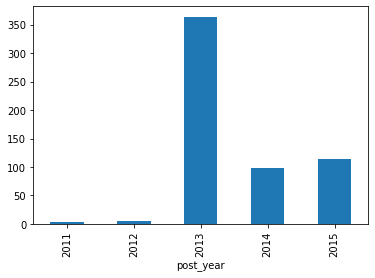

In [30]:
# Plot the average number of votes for helpful reviews across year
dat_by_year['num_found_helpful'].mean().plot(kind='bar')

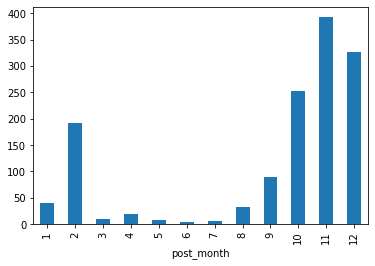

In [31]:
# Plot the average number of votes for helpful reviews across month
dat_by_month['num_found_helpful'].mean().plot(kind='bar')

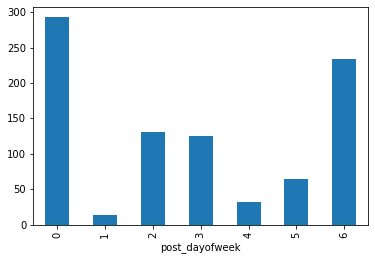

In [32]:
# Plot the average number of votes for helpful reviews across day of week
dat_by_dayofweek['num_found_helpful'].mean().plot(kind='bar')

From the above three barcharts, we can find that most helpful reviews were posted in year 2013, from October to December, and on Sundays and Mondays. We notice that dota 2 has many international players who are living in a timezone different from USA.



## 3.4. Correlation Analysis

In [33]:
# Show correlation matrix
dat.corr(method='pearson')

,num_guides,num_found_unhelpful,friend_player_level,num_reviews,total_game_hours_last_two_weeks,num_workshop_items,num_groups,num_games_owned,num_voted_helpfulness,num_comments,...,num_friends,total_game_hours,num_found_funny,num_screenshots,found_helpful_percentage,num_found_helpful,post_year,post_month,post_dayofweek,recommend
num_guides,1.000000,0.039996,0.066016,0.186746,0.037226,0.027354,0.075041,0.040083,0.031866,0.037268,...,0.055910,0.060432,0.044200,0.122398,-0.035312,0.030979,-0.013623,-0.032583,0.011689,0.004442
num_found_unhelpful,0.039996,1.000000,0.196507,0.081824,0.082768,-0.008091,0.132995,0.288222,0.983827,0.947387,...,0.143909,0.115769,0.150992,0.040057,-0.052149,0.980389,-0.042042,0.100024,-0.006635,-0.001821
friend_player_level,0.066016,0.196507,1.000000,0.330720,0.027974,0.058023,0.352714,0.604007,0.159602,0.219251,...,0.408139,0.094035,0.010680,0.231022,-0.184706,0.155529,-0.115167,-0.061568,0.024886,-0.044337
num_reviews,0.186746,0.081824,0.330720,1.000000,-0.064122,0.103383,0.273113,0.416515,0.072622,0.084577,...,0.147599,-0.062217,-0.000280,0.335564,-0.149053,0.071551,-0.093527,-0.061367,-0.005622,-0.108236
total_game_hours_last_two_weeks,0.037226,0.082768,0.027974,-0.064122,1.000000,-0.026910,-0.001680,0.046182,0.074730,0.144638,...,0.144900,0.601172,0.059478,-0.036367,0.043778,0.073774,0.084025,0.041282,0.050412,0.075827
num_workshop_items,0.027354,-0.008091,0.058023,0.103383,-0.026910,1.000000,0.047670,0.046194,-0.009978,-0.007202,...,0.047717,-0.021641,-0.006583,0.099286,-0.039818,-0.010153,-0.034410,-0.006740,-0.007893,-0.027274
num_groups,0.075041,0.132995,0.352714,0.273113,-0.001680,0.047670,1.000000,0.343328,0.112134,0.171867,...,0.315248,0.003588,-0.016275,0.210179,-0.123474,0.109795,-0.038786,-0.026724,0.016070,-0.021773
num_games_owned,0.040083,0.288222,0.604007,0.416515,0.046182,0.046194,0.343328,1.000000,0.253910,0.362342,...,0.220419,0.119154,0.003720,0.219465,-0.130842,0.249948,-0.169682,-0.011231,0.033142,-0.066798
num_voted_helpfulness,0.031866,0.983827,0.159602,0.072622,0.074730,-0.009978,0.112134,0.253910,1.000000,0.938568,...,0.139160,0.108630,0.141117,0.037239,-0.020604,0.999833,-0.041698,0.104684,-0.012860,0.021985
num_comments,0.037268,0.947387,0.219251,0.084577,0.144638,-0.007202,0.171867,0.362342,0.938568,1.000000,...,0.160458,0.193574,0.168995,0.051626,-0.044090,0.935963,-0.025879,0.096835,0.014065,0.002559


Let's focus on the paire-wise correlation involving 'num_found_helpful'.

In [34]:
dat.corr(method='pearson')['num_found_helpful']

num_guides                         0.030979
num_found_unhelpful                0.980389
friend_player_level                0.155529
num_reviews                        0.071551
total_game_hours_last_two_weeks    0.073774
num_workshop_items                -0.010153
num_groups                         0.109795
num_games_owned                    0.249948
num_voted_helpfulness              0.999833
num_comments                       0.935963
num_badges                         0.170826
num_friends                        0.138424
total_game_hours                   0.107704
num_found_funny                    0.139853
num_screenshots                    0.036884
found_helpful_percentage          -0.017352
num_found_helpful                  1.000000
post_year                         -0.041587
post_month                         0.104970
post_dayofweek                    -0.013472
recommend                          0.024374
Name: num_found_helpful, dtype: float64

From the correlation analysis, we find that the reviews found useful are positively associated with the user's gaming experience such as num_badges, num_games_owned, and total_game_hours. The social network relationship of the user in the online game platform also matters: users with more friends (particularly when those friends have high levels) and groups tend to post high quality reviews. Such social network relationship is sometimes called **social capital**.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

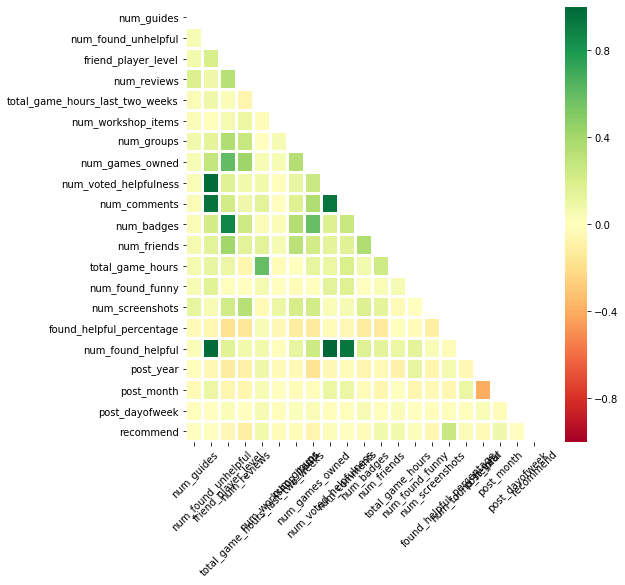

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Create a mask to display only the lower triangle of the matrix
mask = np.zeros_like(dat.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dat.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
# cmap is a colormap. For more information, refer to http://matplotlib.org/examples/color/colormaps_reference.html

plt.yticks(rotation=0)
plt.xticks(rotation=45)

According to the correlation analysis, it seems the following variables are good predictors for num_found_helpful:

- friend_player_level
- num_badges
- num_friends
- num_games_owned
- num_groups
- total_game_hours

Although variables including "num_comments", "num_found_unhelpful", and "num_voted_helpfulness" have a very high correlation with the "num_found_helpful", they are NOT appropriate to work as predictors for the "num_found_helpful". The two variables "num_comments" and "num_found_unhelpful" will not be known before we predict num_found_helpful. The column "num_voted_helpfulness" is the total votes of helpful reviews a user has received, which already contains the num_found_helpful of the current review.

Given the reason, let's create a refined dataset by deselecting some unrelated variables from the original data frame. 

In [36]:
dat_refined = dat[['recommend','num_found_helpful','friend_player_level','num_badges','num_friends',
                  'num_games_owned','num_groups','num_guides','num_reviews','num_screenshots',
                  'num_workshop_items','total_game_hours','total_game_hours_last_two_weeks',
                  'post_year','post_month','post_dayofweek']]
dat_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 16 columns):
recommend                          9720 non-null int64
num_found_helpful                  9720 non-null int64
friend_player_level                8450 non-null float64
num_badges                         8449 non-null float64
num_friends                        8415 non-null float64
num_games_owned                    9720 non-null int64
num_groups                         7714 non-null float64
num_guides                         9720 non-null int64
num_reviews                        9720 non-null int64
num_screenshots                    9720 non-null int64
num_workshop_items                 9720 non-null int64
total_game_hours                   9720 non-null float64
total_game_hours_last_two_weeks    9720 non-null float64
post_year                          9720 non-null int64
post_month                         9720 non-null int64
post_dayofweek                     9720 non-null int64
d

## 3.5. Explore the Refined Dataset

First, let's show the histogram of numerical columns in the refined dataset, excluding the year, month, and dayofweek.

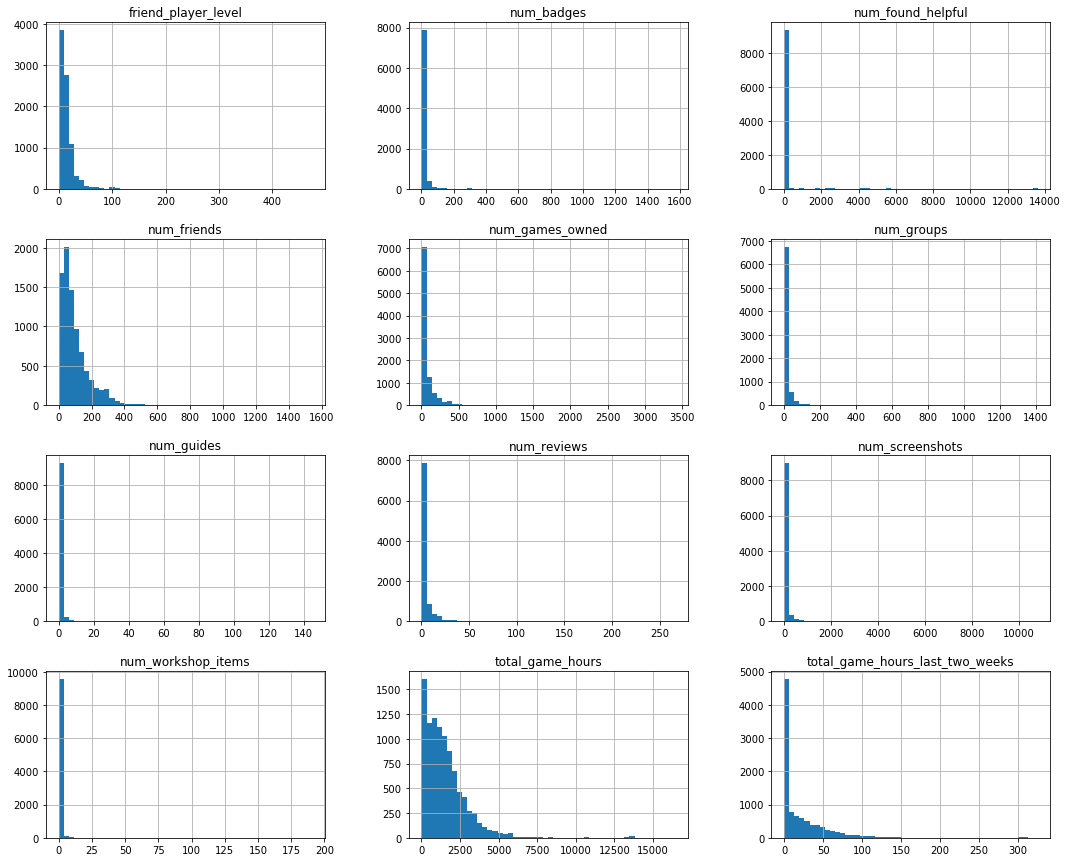

In [37]:
column_index = ['num_found_helpful','friend_player_level','num_badges','num_friends',
                'num_games_owned','num_groups','num_guides','num_reviews','num_screenshots',
                'num_workshop_items','total_game_hours','total_game_hours_last_two_weeks']
histogram1 = dat_refined[column_index].hist(bins=50, figsize=(18,15))

From the histograms, we can find that all variables are distributed with skewness. We can log transform those variables.

In [38]:
# Get a copy of the refined dataset
ln_dat_refined = dat_refined.copy()

# Log transform columns excluding num_found_hepful
for column in ln_dat_refined[column_index]:
    ln_dat_refined[column] = np.log(ln_dat_refined[column] + 1)

# Summary statistics of the log tranformed dataset
ln_dat_refined[column_index].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_found_helpful,9720.0,1.208927,1.579809,0.000000,0.000000,1.098612,1.386294,9.518927
friend_player_level,8450.0,2.321257,0.823569,0.000000,1.609438,2.397895,2.890372,6.165418
num_badges,8449.0,2.170454,0.831586,0.693147,1.386294,1.945910,2.639057,7.358831
num_friends,8415.0,4.222499,0.949097,0.693147,3.663562,4.304065,4.897840,7.341484
num_games_owned,9720.0,2.767589,1.880136,0.000000,1.098612,2.833213,4.343805,8.134174
num_groups,7714.0,2.145285,1.062867,0.693147,1.386294,1.945910,2.772589,7.253470
num_guides,9720.0,0.141354,0.447059,0.000000,0.000000,0.000000,0.000000,4.983607
num_reviews,9720.0,1.136624,0.898530,0.000000,0.693147,0.693147,1.609438,5.587249
num_screenshots,9720.0,2.014632,2.003542,0.000000,0.000000,1.609438,3.401197,9.288134
num_workshop_items,9720.0,0.077513,0.354359,0.000000,0.000000,0.000000,0.000000,5.257495


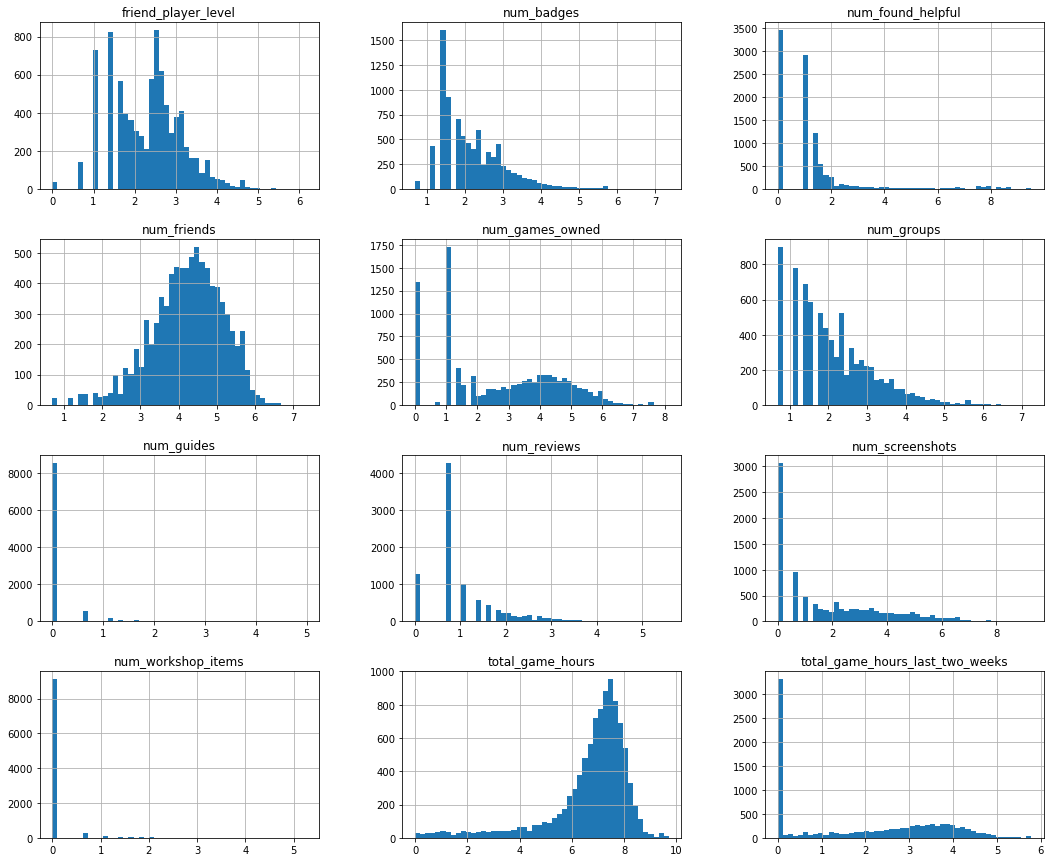

In [39]:
# Show histograms of log transformed variables
historam2 = ln_dat_refined[column_index].hist(bins=50, figsize=(18,15))

We can find that after log transformed, the skewness problem of some variables has been alleviated.

## 3.6. Relationships between User Experience with Quality of Reviews

Let's first use the refined dataset to plot the relationship between num_found_helpful and num_games_owned.

Text(0, 0.5, 'Number Found Helpful')

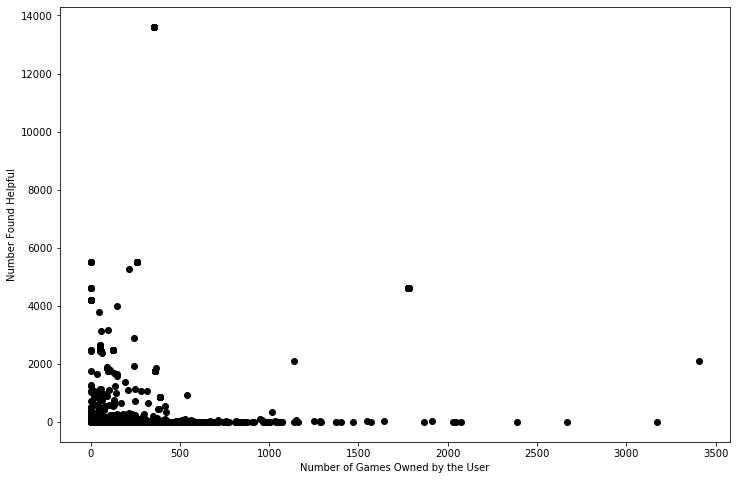

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(dat_refined['num_games_owned'], dat_refined['num_found_helpful'], color='black')
plt.xlabel('Number of Games Owned by the User')
plt.ylabel('Number Found Helpful')

What we can see from the above scatter plot is that the relationship is not clear, as there are some very large values (i.e., skewness). We'd better use the log transformed dataset to visualize the relationships.

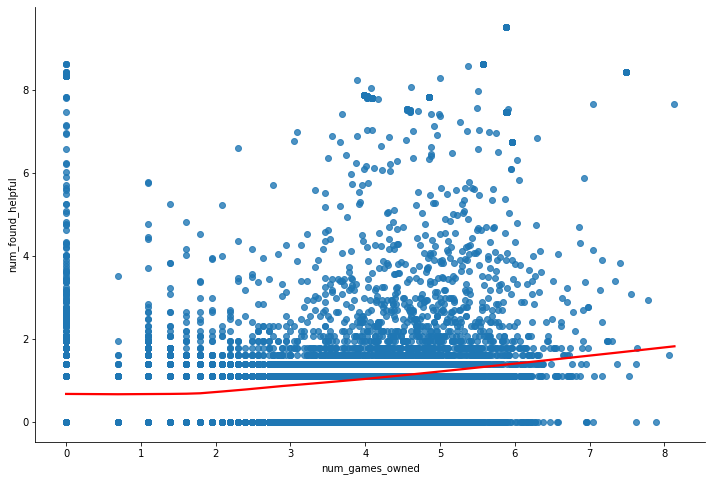

In [41]:
rp = sns.regplot(ln_dat_refined['num_games_owned'],
                 ln_dat_refined['num_found_helpful'],
                 lowess=True, line_kws={'color': 'red'})
rp.figure.set_size_inches(12, 8)
sns.despine()

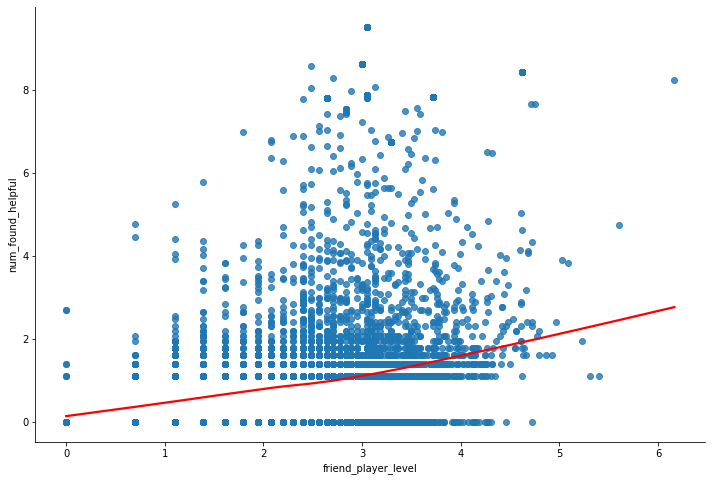

In [42]:
rp = sns.regplot(ln_dat_refined['friend_player_level'],
                 ln_dat_refined['num_found_helpful'],
                 lowess=True, line_kws={'color': 'red'})
rp.figure.set_size_inches(12, 8)
sns.despine()

It may not be efficient to draw a scatter plot for each pair of two variables, especially when there are many variables.

An easier way is to draw a scatter plot matrix in a single plot. 

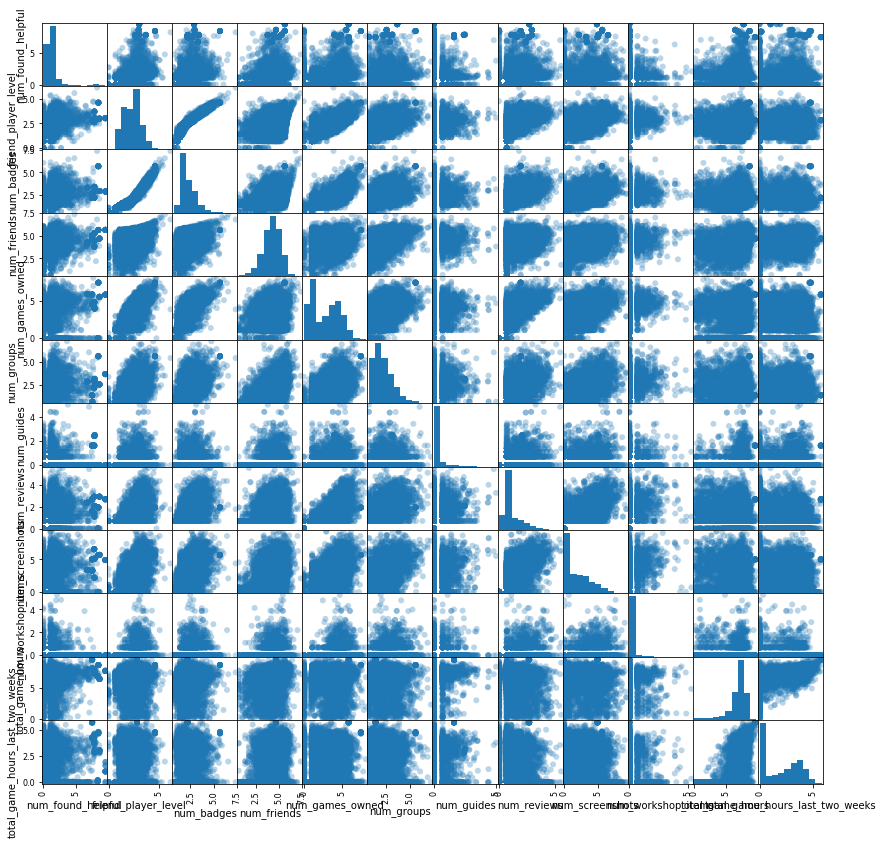

In [43]:
scatterplot = pd.plotting.scatter_matrix(ln_dat_refined[column_index],
                           alpha=0.3,
                           figsize=(14, 14),
                           diagonal='hist',
                           marker='o',
                           grid=True)

## 3.7 Textual Data Exploration

The review column is in textual format. We can use text analytics methods to explore the textual content.

In [44]:
# Show the first 5 reviews
dat.loc[0:5,'review']

0    This game taught me about the diversity of cul...
1    Side effects include: -Hatred of other humans ...
2    It's like roulette; fun until it turns into Ru...
3    Causes anxiety problems, low self esteem, Tour...
4    In Dota 2, Not many people speak your language...
5            And you thought real life was a struggle.
Name: review, dtype: object

As we can see, the textual contents are not fully displayed above. Let's convert the pandas Series into a list and show the content in the list.

In [45]:
# convert the review text into list
documents = dat['review'].tolist()

# Show the first 5 review texts
documents[0:5]

['This game taught me about the diversity of cultures that our small little corner of the universe offers. Then it taught me to hate them all.',
 'Side effects include: -Hatred of other humans -Lack of trust in others -Carpal Tunnel -Improved hand eye coordination -A large ego -Weight gain -Weight loss -Confidence -Despression -Extreme Racism -EXTREME RACISM -Increased strategic thinking capabilities -Mushy-brain syndrome -Subconsciously learning a new language -Subconsciously learning to hate the culture of said language -Literally every ailment that is not a transmitable disease 9/10 Doctors accepted this game on their recommendation list, but the tenth was afk',
 "It's like roulette; fun until it turns into Russian.",
 "Causes anxiety problems, low self esteem, Tourette's syndrome, mood swings, Bipolar disorder, breakdown of relationships, raging erections, racism. Would definitely recommend.",
 "In Dota 2, Not many people speak your language. Not many people play well. Not many peo

### 3.7.1. Creat Word Clouds

In [46]:
# Import wordcloud module
from wordcloud import WordCloud

#### 3.7.1.1. Word Cloud of All Reviews

In [47]:
# Combine all review documents together
text = " ".join(str(x) for x in documents)

In [48]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white",max_font_size=40)

wordcloud.generate_from_text(text)

(-0.5, 399.5, 199.5, -0.5)

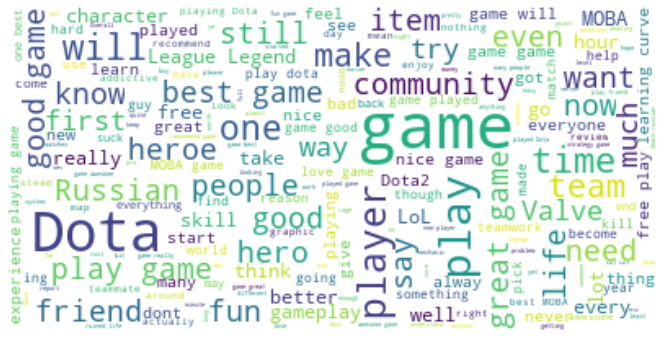

In [49]:
# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
#ax.set_axis_bgcolor("lightslategray")
plt.axis("off")

#### 3.7.1.2. Word Cloud of the Recommended Reviews

In [50]:
rec_text = dat[dat['recommend']==1]['review'].tolist()

In [51]:
len(rec_text)

9163

In [52]:
# Combine review documents together
rec_text = " ".join(str(x) for x in rec_text)

In [53]:
len(rec_text)

1840655

In [54]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white",max_font_size=40)

wordcloud.generate_from_text(rec_text)

(-0.5, 399.5, 199.5, -0.5)

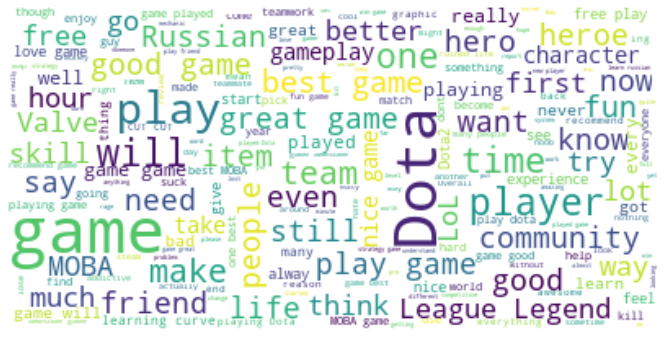

In [55]:
# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
#ax.set_axis_bgcolor("lightslategray")
plt.axis("off")

#### 3.7.1.3. Word Cloud of the Not Recommended Reviews

In [56]:
nrec_text = dat[dat['recommend']==0]['review'].tolist()

In [57]:
# Combine review documents together
nrec_text = " ".join(str(x) for x in nrec_text)

In [58]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white",max_font_size=40)

wordcloud.generate_from_text(nrec_text)

(-0.5, 399.5, 199.5, -0.5)

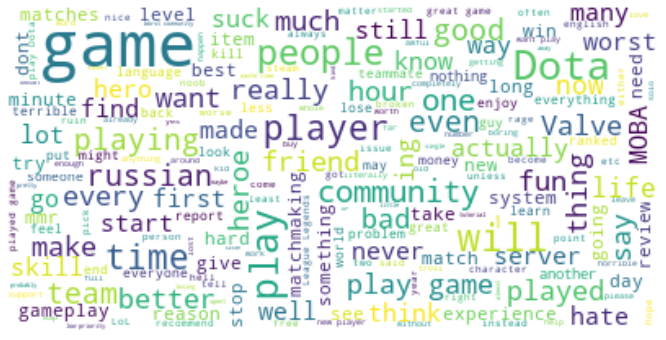

In [59]:
# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
#ax.set_axis_bgcolor("lightslategray")
plt.axis("off")

We can find that there are some frequent words with negative emotions in the reviews that are not recommended. Such words include: suck, hate, bad etc. It seems that the sentiment expressed in the review text is associated with the vote that the review is found helpful.

Let's conduct a sentiment analysis to formally test the association.

### 3.7.2. List-Based Sentiment Analysis

Here we would like to do a list-based sentiment analysis. Specifically, we use lists of positive and negative sentiment words to calculate the sentiment scores.

- Positive sentiment score is measured as the percentage of positive sentiment words in the text;

- Negative sentiment score is measured as the percentage of negative sentiment words in the text.

#### 3.7.2.1. Create Document-Term Matrix

For textual data processing, we use the NLTK package (http://www.nltk.org/).

Then we use the sklearn.feature_extraction.CountVectorizer() method to convert a collection of text documents to a matrix of token counts. Refer to the following link for more detail.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [60]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# Download stopwords
nltk.download('stopwords')

# Define a function to preprocess the textual document
def preprocess(sentence):
    # Convert to lower case
    sentence = sentence.lower()
    
    # Tokenize
    tokens = word_tokenize(sentence)
    
    # Remove punctuations and numbers
    punctuation = re.compile(r'[-.?!,"\':;()|0-9]')
    tokens = [punctuation.sub("", word) for word in tokens]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    return " ".join(tokens)
    # Stemming
    #stemmed = []
    #for item in tokens:
    #    stemmed.append(PorterStemmer().stem(item))
    
    #return " ".join(stemmed)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chenla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
documents[0]

'This game taught me about the diversity of cultures that our small little corner of the universe offers. Then it taught me to hate them all.'

In [62]:
nltk.download('punkt')
# Test the document by using several reviews
preprocess(documents[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'game taught diversity cultures small little corner universe offers  taught hate '

In [63]:
documents[4]

"In Dota 2, Not many people speak your language. Not many people play well. Not many people talk nicely. Not many people work as a team. But if you find people that do... You'll have the most fun you've ever had."

In [64]:
preprocess(documents[4])

'dota   many people speak language  many people play well  many people talk nicely  many people work team  find people  fun ever '

In [65]:
# Preprocess all documents, this may need some time
for i in np.arange(len(documents)):
    documents[i] = preprocess(documents[i])

# Show the 1st 5 reviews after preprocessing
documents[0:5]

['game taught diversity cultures small little corner universe offers  taught hate ',
 'side effects include  hatred humans lack trust others carpal tunnel improved hand eye coordination large ego weight gain weight loss confidence despression extreme racism extreme racism increased strategic thinking capabilities mushybrain syndrome subconsciously learning new language subconsciously learning hate culture said language literally every ailment transmitable disease / doctors accepted game recommendation list  tenth afk',
 'like roulette  fun turns russian ',
 'causes anxiety problems  low self esteem  tourette syndrome  mood swings  bipolar disorder  breakdown relationships  raging erections  racism  would definitely recommend ',
 'dota   many people speak language  many people play well  many people talk nicely  many people work team  find people  fun ever ']

Now, we create the document-term matrix, applying the bag-of-words assumption.

In [66]:
from sklearn.feature_extraction import text

In [67]:
# Set binary=False to get raw term frequency
vectorizer = text.CountVectorizer(analyzer='word',
                                  max_features = 400,
                                  binary=False)

In [68]:
text_features = vectorizer.fit_transform(documents)

In [69]:
# Show the first 10 features
vectorizer.get_feature_names()[0:10]

['abilities',
 'able',
 'action',
 'actually',
 'addicted',
 'addicting',
 'addictive',
 'almost',
 'alot',
 'already']

In [70]:
# Create a text feature data frame
text_features_df = pd.DataFrame(text_features.toarray(), 
                                columns=vectorizer.get_feature_names())

text_features_df.head()

,abilities,able,action,actually,addicted,addicting,addictive,almost,alot,already,...,world,worst,worth,would,wrong,yeah,year,years,yes,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
text_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Columns: 400 entries, abilities to yet
dtypes: int64(400)
memory usage: 29.7 MB


In [72]:
text_features_df.describe()

,abilities,able,action,actually,addicted,addicting,addictive,almost,alot,already,...,world,worst,worth,would,wrong,yeah,year,years,yes,yet
count,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,...,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000
mean,0.011111,0.012037,0.009568,0.018004,0.014198,0.013889,0.030144,0.016667,0.008951,0.010700,...,0.032305,0.018210,0.018416,0.101543,0.009774,0.008745,0.012963,0.020782,0.016255,0.013580
std,0.132566,0.127337,0.102500,0.173881,0.120037,0.122197,0.176325,0.154934,0.112141,0.105847,...,0.199767,0.152415,0.136732,0.409374,0.110220,0.117532,0.128454,0.171483,0.162116,0.124318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,4.000000,2.000000,5.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,...,5.000000,3.000000,2.000000,14.000000,3.000000,7.000000,3.000000,5.000000,5.000000,3.000000


#### 3.7.2.2. Frequent Terms Used in Reviews

In [73]:
# Sum up the counts of each vocabulary word
word_freq = np.sum(text_features_df, axis=0)

np.sort(word_freq)

array([   77,    77,    77,    77,    78,    78,    78,    79,    79,
          79,    79,    80,    80,    80,    80,    80,    80,    81,
          81,    81,    81,    81,    82,    82,    82,    82,    82,
          82,    82,    82,    82,    83,    83,    83,    83,    83,
          83,    83,    84,    84,    84,    84,    84,    85,    85,
          85,    85,    85,    85,    85,    85,    85,    86,    86,
          86,    86,    86,    87,    87,    87,    87,    87,    88,
          88,    88,    89,    89,    89,    90,    90,    90,    90,
          90,    91,    91,    91,    92,    92,    92,    92,    93,
          93,    93,    94,    95,    95,    95,    95,    95,    96,
          96,    96,    96,    97,    97,    98,    98,    98,    99,
          99,    99,    99,   100,   100,   100,   101,   101,   102,
         102,   103,   104,   104,   104,   104,   104,   104,   105,
         105,   105,   106,   106,   106,   106,   106,   106,   106,
         107,   107,

In [74]:
# Show the top words in the text features

word_freq_df = pd.DataFrame({'Freq':word_freq})
word_freq_df.head()

,Freq
abilities,108
able,117
action,93
actually,175
addicted,138


In [75]:
# Sort the data frame
word_freq_df = word_freq_df.sort_values('Freq', ascending=False)

<Figure size 576x432 with 0 Axes>

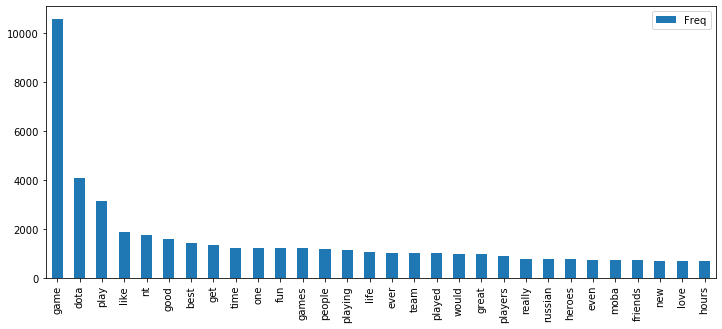

In [76]:
# Visualize the top 30 words
plt.figure(figsize=(8,6))
word_freq_df.head(30).plot(kind='bar',figsize=(12,5))

#### 3.7.2.3. Import Sentiment Words List

In [77]:
# Import sentiment words list

positive_df = pd.read_csv("Hu_Liu_positive_word_list.txt", 
                          header=None, names=["Positive"], encoding='latin1')

positive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 1 columns):
Positive    2006 non-null object
dtypes: object(1)
memory usage: 15.8+ KB


In [78]:
positive_df.head()

,Positive
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [79]:
negative_df = pd.read_csv("Hu_Liu_negative_word_list.txt",
                          header=None, names=["Negative"], encoding='latin1')

negative_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783 entries, 0 to 4782
Data columns (total 1 columns):
Negative    4783 non-null object
dtypes: object(1)
memory usage: 37.5+ KB


In [80]:
negative_df.head()

,Negative
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


#### 3.7.2.4. Calculate Sentiment Scores

In [81]:
import re
def tokenizer(review):
    theTokens = re.findall(r'\b\w[\w-]*\b', review.lower())
    return theTokens

def count_positive_words(review):
    # Count positive words
    numPosWords = 0
    theTokens = tokenizer(review)
    for word in theTokens:
        if word in positive_df['Positive'].tolist():
            numPosWords += 1
            
    return numPosWords

def count_negative_words(review):
    # Count negative words
    numNegWords = 0
    theTokens = tokenizer(review)
    for word in theTokens:
        if word in negative_df['Negative'].tolist():
            numNegWords += 1
    
    return numNegWords

def count_words(review):
    # Count words
    numWords = 0
    theTokens = tokenizer(review)
    for word in theTokens:
        numWords += 1
            
    return numWords

In [82]:
# Test the 2nd review
count_positive_words(documents[1])

5

In [83]:
# Test the 2nd review
count_negative_words(documents[1])

8

In [84]:
# Test the 2nd review
count_words(documents[1])

54

In [85]:
# Initialize word counts as zero vectors
positive_words = np.zeros(len(documents))
negative_words = np.zeros(len(documents))
total_words = np.zeros(len(documents))

In [86]:
len(positive_words)

9720

In [87]:
len(negative_words)

9720

In [88]:
len(total_words)

9720

In [89]:
# Calculate count of words in each document
for i in np.arange(len(documents)): 
    positive_words[i] = count_positive_words(documents[i])
    negative_words[i] = count_negative_words(documents[i])
    total_words[i] = count_words(documents[i])

Now we are ready to calculate sentiment scores for each review. Let's add the two sentiment score columns in the refined dataframe.

In [90]:
# Calculate sentiment scores
dat_refined['pos_sentiment'] = positive_words/total_words
dat_refined['neg_sentiment'] = negative_words/total_words

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [91]:
# Summary statistics of sentiment scores
dat_refined[['pos_sentiment','neg_sentiment']].describe()

,pos_sentiment,neg_sentiment
count,9710.000000,9710.000000
mean,0.183037,0.066913
std,0.197685,0.121200
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.133333,0.000000
75%,0.250000,0.095238
max,1.000000,1.000000


In [92]:
# Correlation between positive and negative sentiment scores
dat_refined[['pos_sentiment','neg_sentiment']].corr()

,pos_sentiment,neg_sentiment
pos_sentiment,1.000000,-0.288062
neg_sentiment,-0.288062,1.000000


We find that the positive sentiment score is negatively associated with the negative sentiment score. That makes sense.

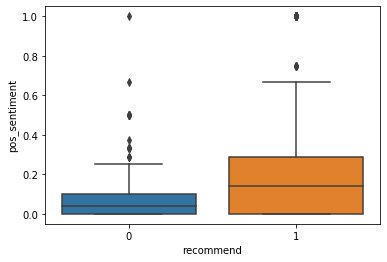

In [93]:
ax = sns.boxplot(x="recommend", y="pos_sentiment", data=dat_refined)

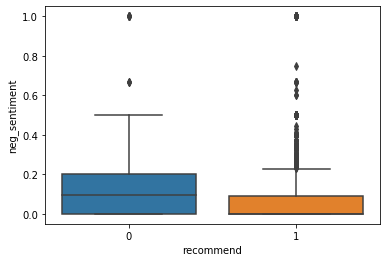

In [94]:
ax = sns.boxplot(x="recommend", y="neg_sentiment", data=dat_refined)

From the above box plots, we can see that recommended reviews tend to have a higher positive sentiment score and a lower negative sentiment score.

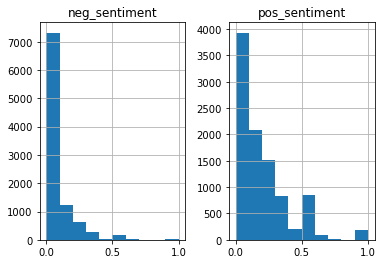

In [95]:
# histograms of sentiment scores
histogram3 = dat_refined[['pos_sentiment','neg_sentiment']].hist()

Log transform the sentiment scores and add them into the transformed dataset.

In [96]:
# Add sentiment scores to the log transformed dataset
ln_dat_refined['pos_sentiment'] = np.log(dat_refined['pos_sentiment']+1)
ln_dat_refined['neg_sentiment'] = np.log(dat_refined['neg_sentiment']+1)

# 4. Prepare Master Dataset for Regression and Predictive Modeling

## 4.1. Create Dummies

The post_month and post_dayofweek should be treated as categorical variables. Thus, we replace them by dummy variables. 

In [97]:
# Update post_month as dummies
dat_refined = pd.concat([dat_refined.drop('post_month',axis=1),
                         pd.get_dummies(dat_refined['post_month']).rename(columns=lambda x: 'M_' + str(x))],
                        axis=1, join_axes=[dat_refined.index])

ln_dat_refined = pd.concat([ln_dat_refined.drop('post_month',axis=1),
                         pd.get_dummies(ln_dat_refined['post_month']).rename(columns=lambda x: 'M_' + str(x))],
                        axis=1, join_axes=[ln_dat_refined.index])

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  after removing the cwd from sys.path.
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


In [98]:
# Update post_dayofweek as dummies
dat_refined = pd.concat([dat_refined.drop('post_dayofweek',axis=1),
                         pd.get_dummies(dat_refined['post_dayofweek']).rename(columns=lambda x: 'WDay_' + str(x))],
                        axis=1, join_axes=[dat_refined.index])

ln_dat_refined = pd.concat([ln_dat_refined.drop('post_dayofweek',axis=1),
                         pd.get_dummies(ln_dat_refined['post_dayofweek']).rename(columns=lambda x: 'WDay_' + str(x))],
                        axis=1, join_axes=[ln_dat_refined.index])

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  after removing the cwd from sys.path.
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


In [99]:
dat_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 35 columns):
recommend                          9720 non-null int64
num_found_helpful                  9720 non-null int64
friend_player_level                8450 non-null float64
num_badges                         8449 non-null float64
num_friends                        8415 non-null float64
num_games_owned                    9720 non-null int64
num_groups                         7714 non-null float64
num_guides                         9720 non-null int64
num_reviews                        9720 non-null int64
num_screenshots                    9720 non-null int64
num_workshop_items                 9720 non-null int64
total_game_hours                   9720 non-null float64
total_game_hours_last_two_weeks    9720 non-null float64
post_year                          9720 non-null int64
pos_sentiment                      9710 non-null float64
neg_sentiment                      9710 non-null float

# 5. Regression Analysis

We create X and y datasets to represent predictors and dependent variables correpondingly.

In [100]:
from patsy import dmatrices

# Create design matrices
y, X = dmatrices('num_found_helpful ~ friend_player_level + num_badges +' + 
                 'num_friends + num_games_owned + num_groups + num_guides + num_reviews +' +
                 'num_screenshots + num_workshop_items + total_game_hours + ' +
                 'total_game_hours_last_two_weeks + pos_sentiment + neg_sentiment + post_year + '+
                 'M_2 + M_3 + M_4 + M_5 + M_6 + M_7 + M_8 + M_9 + M_10 + M_11 + M_12 + '+
                 'WDay_1 + WDay_2 + WDay_3 + WDay_4 + WDay_5 + WDay_6',
                 data=dat_refined,
                 return_type='dataframe')

In [101]:
y.shape

(7683, 1)

In [102]:
X.shape

(7683, 32)

We use the statsmodels package to conduct the regression analysis.

In [103]:
import statsmodels.api as sm

Fitting a model in statsmodels typically involves 3 easy steps:

- Use the model class to describe the model
- Fit the model using a class method
- Inspect the results using a summary method

In [104]:
# Describe the linear model
mod = sm.OLS(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      num_found_helpful   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     38.69
Date:                Tue, 21 Jan 2020   Prob (F-statistic):          8.18e-215
Time:                        11:49:30   Log-Likelihood:                -63140.
No. Observations:                7683   AIC:                         1.263e+05
Df Residuals:                    7651   BIC:                         1.266e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -1.918e+05   4.03e+04     -4.761      0.000   -2.71e+05   -1.13e+05
friend_player_level                -5.2122      1.419     -3.674      0.000      -7.993      -2.431
num_badges                          1.6403      0.661      2.483      0.013       0.345       2.935
num_friends                         0.8622      0.127      6.795      0.000       0.613       1.111
num_games_owned                     1.3716      0.078     17.585      0.000       1.219       1.524
num_groups                          0.1770      0.250      0.708      0.479      -0.313       0.667
num_guides                          6.7912      3.029      2.242      0.025       0.854      12.729
num_reviews                        -1.8391      0.995     -1.849      0.064      -3.789       0.111
num_screenshots                    -0.0031      0.027     -0.115      0.908      -0.056       0.050
num_workshop_items                 -5.1626      2.765     -1.867      0.062     -10.583       0.258
total_game_hours                    0.0343      0.009      3.813      0.000       0.017       0.052
total_game_hours_last_two_weeks     0.2883      0.382      0.755      0.450      -0.460       1.037
pos_sentiment                     -19.3936     55.265     -0.351      0.726    -127.728      88.940
neg_sentiment                     890.2860     89.043      9.998      0.000     715.738    1064.835
post_year                          95.2326     20.001      4.761      0.000      56.024     134.441
M_2                               157.9133     50.864      3.105      0.002      58.206     257.621
M_3                               -44.3368     54.523     -0.813      0.416    -151.218      62.544
M_4                               -16.9069     56.422     -0.300      0.764    -127.509      93.695
M_5                                -8.1393     51.156     -0.159      0.874    -108.418      92.140
M_6                                 8.7507     47.075      0.186      0.853     -83.529     101.030
M_7                                21.7478     51.352      0.424      0.672     -78.916     122.411
M_8                                81.8496     49.010      1.670      0.095     -14.223     177.922
M_9                               142.6003     50.826      2.806      0.005      42.968     242.233
M_10                              204.1998     51.926      3.932      0.000     102.410     305.990
M_11                              357.1992     50.731      7.041      0.000     257.753     456.645
M_12                              439.4978     48.755      9.014      0.000     343.925     535.070
WDay_1                           -338.9774     38.926     -8.708      0.000    -415.283    -262.672
WDay_2                           -290.2419     38.624     -7.515      0.000    -365

In [105]:
# Create design matrices
y, X = dmatrices('num_found_helpful ~ friend_player_level + num_badges +' + 
                 'num_friends + num_games_owned + num_groups + num_guides + num_reviews +' +
                 'num_screenshots + num_workshop_items + total_game_hours + ' +
                 'total_game_hours_last_two_weeks + post_year + pos_sentiment + neg_sentiment + '+
                 'M_2 + M_3 + M_4 + M_5 + M_6 + M_7 + M_8 + M_9 + M_10 + M_11 + M_12 + '+
                 'WDay_1 + WDay_2 + WDay_3 + WDay_4 + WDay_5 + WDay_6',
                 data=ln_dat_refined,
                 return_type='dataframe')

# Describe the linear model
mod = sm.OLS(y,X)

# Fit model
fit = mod.fit()

# Summarize model
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      num_found_helpful   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     83.46
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:49:30   Log-Likelihood:                -13466.
No. Observations:                7683   AIC:                         2.700e+04
Df Residuals:                    7651   BIC:                         2.722e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -1006.9474     63.611    -15.830      0.000   -1131.642    -882.253
friend_player_level                -0.1610      0.061     -2.633      0.008      -0.281      -0.041
num_badges                          0.2678      0.058      4.603      0.000       0.154       0.382
num_friends                         0.1040      0.021      4.866      0.000       0.062       0.146
num_games_owned                     0.2312      0.018     12.947      0.000       0.196       0.266
num_groups                         -0.0238      0.021     -1.161      0.246      -0.064       0.016
num_guides                          0.2377      0.035      6.769      0.000       0.169       0.307
num_reviews                         0.2155      0.029      7.331      0.000       0.158       0.273
num_screenshots                     0.0798      0.012      6.917      0.000       0.057       0.102
num_workshop_items                 -0.2589      0.043     -6.012      0.000      -0.343      -0.174
total_game_hours                    0.1038      0.013      8.126      0.000       0.079       0.129
total_game_hours_last_two_weeks     0.0366      0.011      3.246      0.001       0.014       0.059
post_year                           0.4992      0.032     15.814      0.000       0.437       0.561
pos_sentiment                      -0.1865      0.117     -1.596      0.111      -0.416       0.043
neg_sentiment                       0.8613      0.171      5.042      0.000       0.526       1.196
M_2                                 0.4338      0.079      5.476      0.000       0.279       0.589
M_3                                 0.0050      0.085      0.059      0.953      -0.161       0.171
M_4                                 0.0192      0.088      0.218      0.827      -0.153       0.191
M_5                                -0.0363      0.080     -0.455      0.649      -0.192       0.120
M_6                                -0.0636      0.073     -0.867      0.386      -0.207       0.080
M_7                                 0.0982      0.080      1.228      0.219      -0.058       0.255
M_8                                 0.0790      0.077      1.032      0.302      -0.071       0.229
M_9                                 0.1126      0.080      1.416      0.157      -0.043       0.268
M_10                                0.3224      0.081      3.972      0.000       0.163       0.482
M_11                                0.5445      0.079      6.929      0.000       0.390       0.699
M_12                                0.4433      0.076      5.834      0.000       0.294       0.592
WDay_1                             -0.1840      0.061     -3.037      0.002      -0.303      -0.065
WDay_2                             -0.0686      0.060     -1.140      0.254      -0

We can find that the relationships on the log transformed dataset are more generally more significant than those on the non-log transformed dataset. Log transformation is a useful way to alleviate skewed distribution of the variables. Also, the regression on the log transformed model has a higher level of model fit (adjusted R2 is 0.250, which is not bad).

The coefficients obtained by using the log-transformed x and y can be interpreted as: change x by one percent, y would change by 𝛽 percent on average. Thus:

- Increase the number of badeges by 1%, the number found helpful would increase by 0.268% on average.
- Increase the number of friends by 1%, the number found helpful would increase by 0.104% on average.
- Increase the number of games owned by 1%, the number found helpful would increase by 0.231% on average.
- Increase the number of guides by 1%, the number found helpful would increase by 0.238% on average.
- Increase the number of reviews by 1%, the number found helpful would increase by 0.216% on average.
- Increase the number of screenshots by 1%, the number found helpful would increase by 0.080% on average.
- Increase the number of workshop items by 1%, the number found helpful would decrease by 0.259% on average.
- Increase the total game hours by 1%, the number found helpful would increase by 0.104% on average.
- Increase the total game hours in the last two weeks by 1%, the number found helpful would increase by 0.037% on average.
- Increase the negative sentiment score by 1%, the number found helpful would increase by 0.862% on average.

We do not find significant effect of the number of groups on number found helpful (p value = 0.246 > 0.05). We get very similar results as those of correlation analysis.

# 6. Predictive Modeling

## 6.1. Create Design Matrices

In [106]:
# Create design matrices without intercept term
y, X = dmatrices('recommend ~ 0 + friend_player_level + num_badges +' + 
                 'num_friends + num_games_owned + num_groups + num_guides + num_reviews +' +
                 'num_screenshots + num_workshop_items + total_game_hours + ' +
                 'total_game_hours_last_two_weeks + post_year + pos_sentiment + neg_sentiment +'+
                 'M_2 + M_3 + M_4 + M_5 + M_6 + M_7 + M_8 + M_9 + M_10 + M_11 + M_12 + '+
                 'WDay_1 + WDay_2 + WDay_3 + WDay_4 + WDay_5 + WDay_6',
                 data=dat_refined,
                 return_type='dataframe')

In [107]:
y.head()

,recommend
0,1.0
1,1.0
3,1.0
4,1.0
5,1.0


In [108]:
X.head().transpose()

,0,1,3,4,5
friend_player_level,19.000000,13.000000,20.00,20.000000,16.00
num_badges,18.000000,8.000000,17.00,18.000000,8.00
num_friends,108.000000,44.000000,280.00,199.000000,107.00
num_games_owned,263.000000,59.000000,357.00,55.000000,359.00
num_groups,12.000000,7.000000,39.00,22.000000,3.00
num_guides,0.000000,4.000000,0.00,10.000000,4.00
num_reviews,18.000000,18.000000,14.00,7.000000,13.00
num_screenshots,295.000000,719.000000,134.00,165.000000,147.00
num_workshop_items,0.000000,0.000000,0.00,0.000000,0.00
total_game_hours,599.400000,2687.800000,2204.00,1520.100000,13418.00


## 6.2. Normalizing Data

It's usually recommended to normalize data before apply some machine learning models such as k-NN and neural network. We normalize the predictor variables to the range of [0, 1]. We can the sklearn.preprocessing module to normalize variables.

In [109]:
from sklearn import preprocessing

In [110]:
X_scale = preprocessing.MinMaxScaler().fit_transform(X)

In [111]:
# Show the type of X_scale
type(X_scale)

numpy.ndarray

In [112]:
X_scale = pd.DataFrame(X_scale,columns=X.columns)

In [113]:
# Show the type of X_scale
type(X_scale)

pandas.core.frame.DataFrame

In [114]:
X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
friend_player_level,7683.0,0.029802,0.033850,0.0,0.010526,0.023158,0.037895,1.0
num_badges,7683.0,0.008425,0.021398,0.0,0.001913,0.003827,0.008291,1.0
num_friends,7683.0,0.067109,0.060605,0.0,0.025957,0.049968,0.089552,1.0
num_games_owned,7683.0,0.025604,0.053513,0.0,0.001174,0.009390,0.028756,1.0
num_groups,7683.0,0.011560,0.032967,0.0,0.001417,0.003544,0.009922,1.0
num_guides,7683.0,0.003650,0.023985,0.0,0.000000,0.000000,0.000000,1.0
num_reviews,7683.0,0.017303,0.046191,0.0,0.000000,0.003774,0.015094,1.0
num_screenshots,7683.0,0.009044,0.038152,0.0,0.000093,0.000740,0.004349,1.0
num_workshop_items,7683.0,0.001871,0.019617,0.0,0.000000,0.000000,0.000000,1.0
total_game_hours,7683.0,0.096533,0.093517,0.0,0.036298,0.078444,0.131280,1.0


## 6.3. Data Partition

In [115]:
from sklearn import model_selection

In [116]:
# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = model_selection.train_test_split(y, X,
                                                                 test_size=0.2,
                                                                 random_state=1)

In [117]:
train_y.shape

(6146, 1)

In [118]:
train_X.shape

(6146, 31)

In [119]:
test_y.shape

(1537, 1)

In [120]:
test_X.shape

(1537, 31)

In [121]:
# Do th similar data partition for the scaled dataset
train_X_scale,test_X_scale = model_selection.train_test_split(X_scale,
                                                              test_size=0.2,
                                                              random_state=1)

## 6.4. K-Nearest Neighbors (kNN)

### 6.4.1. Train a k-NN Classifier

In [122]:
from sklearn import neighbors
import numpy as np

In [123]:
# Candidate values of k
k = np.arange(50) + 1

k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [124]:
para_knn = {'n_neighbors':k}
para_knn

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [125]:
knn = neighbors.KNeighborsClassifier()

In [126]:
grid_knn = model_selection.GridSearchCV(knn, para_knn)

As the kNN algorithm needs to measure distance/similarity between instances, let's use scaled predictors.

In [127]:
grid_knn.fit(train_X_scale,train_y.values.ravel())

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [128]:
# Show best parameters
grid_knn.best_params_


{'n_neighbors': 21}

Since the grid_knn is tuned by using the optimal hyper parameter, we can use the grid_knn as the best k-NN model. We don't need to manually train a knn model with k = 21.

### 6.4.2. Evaluate k-NN Classifier

In [129]:
from sklearn import metrics
import itertools

In [130]:
# Predict on test set
pred_y_knn = grid_knn.predict(test_X_scale)

In [131]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [132]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[   0   93]
 [   0 1444]]


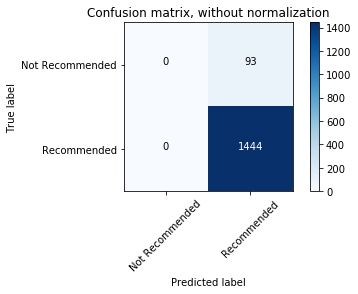

In [133]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(test_y, pred_y_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=['Not Recommended','Recommended'],
                      title='Confusion matrix, without normalization')

From the above plot, we can see that all the recommended reviews have been correctly classified as recommended in the test dataset, while all not recommended reviews have been incorrectly classified as recommended. 

Now, let's calculate some performance metrics.

In [134]:
# Calculate accuracy
metrics.accuracy_score(test_y, pred_y_knn)

0.9394925178919974

In [135]:
# Calculate precision for recommended reviews
metrics.precision_score(test_y, pred_y_knn)

0.9394925178919974

In [136]:
# Calculate recall for recommended reviews
metrics.recall_score(test_y, pred_y_knn)

1.0

In [137]:
# Calculate F1 score for recommended reviews
metrics.f1_score(test_y, pred_y_knn)

0.9688024152968803

In [138]:
# Print classification report
target_names = ['Not Rcommended', 'Recommended']
print(metrics.classification_report(test_y, pred_y_knn, target_names=target_names))

                precision    recall  f1-score   support

Not Rcommended       0.00      0.00      0.00        93
   Recommended       0.94      1.00      0.97      1444

     micro avg       0.94      0.94      0.94      1537
     macro avg       0.47      0.50      0.48      1537
  weighted avg       0.88      0.94      0.91      1537



c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We notice that the datset is unbalanced: there are much more recommended reviews than not recommended reviews in the test dataset. Thus, the accuracy really does not tell us much information regarding the performance of the prediction. We focus on the tradeoff between precision and recall to evaluate the performance of the algorithm.

From the classification report, we can find that the kNN algorithm performs very well in classifying recommended review, but very bad for classifying not recommended reviews.

## 6.5. Decision Tree

### 6.5.1. Train a Classification Tree

In [139]:
from sklearn import tree

In [140]:
np.arange(2,51)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [141]:
para_dt = {'min_samples_split':np.arange(2,51)}
para_dt

{'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [142]:
dt = tree.DecisionTreeClassifier()

In [143]:
grid_dt = model_selection.GridSearchCV(dt, para_dt)

In [144]:
grid_dt.fit(train_X,train_y)

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [145]:
# Show best parameters
grid_dt.best_params_


{'min_samples_split': 48}

### 6.5.2. Evaluate Classification Tree

In [146]:
# Predict on test set
pred_y_dt = grid_dt.predict(test_X)

Confusion matrix, without normalization
[[  17   76]
 [  44 1400]]


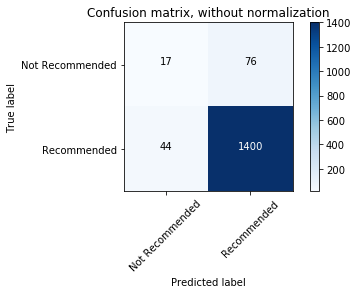

In [147]:
# Compute confusion matrix
cnf_matrix_dt = confusion_matrix(test_y, pred_y_dt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dt, classes=['Not Recommended','Recommended'],
                      title='Confusion matrix, without normalization')

From the above plot, we can see that 1396 out of 1444 recommended reviews have been correctly classified as recommended in the test dataset, while 14 out of 93 not recommended reviews have been correctly classified as not recommended. 

Now, let's calculate some performance metrics.

In [148]:
# Calculate accuracy
metrics.accuracy_score(test_y, pred_y_dt)

0.9219258295380611

In [149]:
# Calculate precision for recommended reviews
metrics.precision_score(test_y, pred_y_dt)

0.948509485094851

In [150]:
# Calculate recall for recommended reviews
metrics.recall_score(test_y, pred_y_dt)

0.9695290858725761

In [151]:
# Calculate F1 score for recommended reviews
metrics.f1_score(test_y, pred_y_dt)

0.958904109589041

In [152]:
# Print classification report
target_names = ['Not Rcommended', 'Recommended']
print(metrics.classification_report(test_y, pred_y_dt, target_names=target_names))

                precision    recall  f1-score   support

Not Rcommended       0.28      0.18      0.22        93
   Recommended       0.95      0.97      0.96      1444

     micro avg       0.92      0.92      0.92      1537
     macro avg       0.61      0.58      0.59      1537
  weighted avg       0.91      0.92      0.91      1537



## 6.6. Artificial Neural Network (MLP)

### 6.6.1. Train an MLP

In [153]:
from sklearn import neural_network

In [154]:
para_ann = {'hidden_layer_sizes':[(300,),
                                  (250,),
                                  (200,),
                                  (150,),
                                  (100,),
                                  (50,),
                                  (50,10),
                                  (9,7,5,3)]}
para_ann

{'hidden_layer_sizes': [(300,),
  (250,),
  (200,),
  (150,),
  (100,),
  (50,),
  (50, 10),
  (9, 7, 5, 3)]}

In [155]:
ann = neural_network.MLPClassifier(max_iter=500)

In [156]:
grid_ann = model_selection.GridSearchCV(ann, para_ann)

In [157]:
grid_ann.fit(train_X_scale,train_y.values.ravel())

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: C

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(300,), (250,), (200,), (150,), (100,), (50,), (50, 10), (9, 7, 5, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [158]:
# Show best parameters
grid_ann.best_params_


{'hidden_layer_sizes': (9, 7, 5, 3)}

### 6.6.2. Evaluate the MLP

In [159]:
# Predict on test set
pred_y_ann = grid_ann.predict(test_X_scale)

Confusion matrix, without normalization
[[  11   82]
 [  14 1430]]


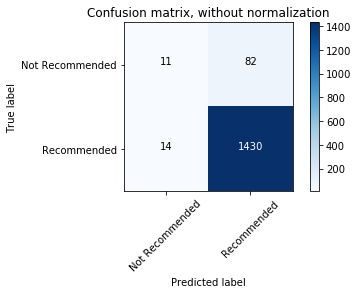

In [160]:
# Compute confusion matrix
cnf_matrix_ann = confusion_matrix(test_y, pred_y_ann)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_ann, classes=['Not Recommended','Recommended'],
                      title='Confusion matrix, without normalization')

Now, let's calculate some performance metrics.

In [161]:
# Calculate accuracy
metrics.accuracy_score(test_y, pred_y_ann)

0.937540663630449

In [162]:
# Calculate precision for recommended reviews
metrics.precision_score(test_y, pred_y_ann)

0.9457671957671958

In [163]:
# Calculate recall for recommended reviews
metrics.recall_score(test_y, pred_y_ann)

0.9903047091412742

In [164]:
# Calculate F1 score for recommended reviews
metrics.f1_score(test_y, pred_y_ann)

0.9675236806495264

In [165]:
# Print classification report
target_names = ['Not Rcommended', 'Recommended']
print(metrics.classification_report(test_y, pred_y_ann, target_names=target_names))

                precision    recall  f1-score   support

Not Rcommended       0.44      0.12      0.19        93
   Recommended       0.95      0.99      0.97      1444

     micro avg       0.94      0.94      0.94      1537
     macro avg       0.69      0.55      0.58      1537
  weighted avg       0.92      0.94      0.92      1537



## 6.7. Random Forests

### 6.6.1. Train a Random Forests

In [166]:
from sklearn import ensemble

In [167]:
para_rf = [{'n_estimators':[3, 10, 20, 30],'max_features':[2,4,6,8,10]},
           {'bootstrap':[False],'n_estimators':[3,10,20],'max_features':[2,3,4]}]
para_rf

[{'n_estimators': [3, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10]},
 {'bootstrap': [False],
  'n_estimators': [3, 10, 20],
  'max_features': [2, 3, 4]}]

In [168]:
rf = ensemble.RandomForestClassifier()

In [169]:
grid_rf = model_selection.GridSearchCV(rf, para_rf)

In [170]:
grid_rf.fit(train_X,train_y.values.ravel())

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10]}, {'bootstrap': [False], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [171]:
# Show best parameters
grid_rf.best_params_


{'max_features': 6, 'n_estimators': 30}

### 6.6.2. Evaluate the Random Forests

In [172]:
# Predict on test set
pred_y_rf = grid_rf.predict(test_X)

Confusion matrix, without normalization
[[  16   77]
 [   4 1440]]


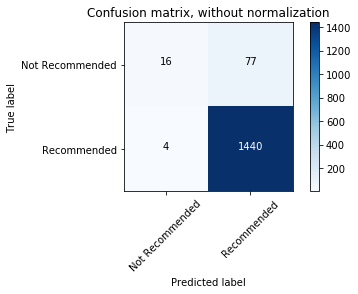

In [173]:
# Compute confusion matrix
cnf_matrix_rf = confusion_matrix(test_y, pred_y_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes=['Not Recommended','Recommended'],
                      title='Confusion matrix, without normalization')

Now, let's calculate some performance metrics.

In [174]:
# Calculate accuracy
metrics.accuracy_score(test_y, pred_y_rf)

0.9472999349381913

In [175]:
# Calculate precision for recommended reviews
metrics.precision_score(test_y, pred_y_rf)

0.9492419248516809

In [176]:
# Calculate recall for recommended reviews
metrics.recall_score(test_y, pred_y_rf)

0.997229916897507

In [177]:
# Calculate F1 score for recommended reviews
metrics.f1_score(test_y, pred_y_rf)

0.9726443768996961

In [178]:
# Print classification report
target_names = ['Not Rcommended', 'Recommended']
print(metrics.classification_report(test_y, pred_y_rf, target_names=target_names))

                precision    recall  f1-score   support

Not Rcommended       0.80      0.17      0.28        93
   Recommended       0.95      1.00      0.97      1444

     micro avg       0.95      0.95      0.95      1537
     macro avg       0.87      0.58      0.63      1537
  weighted avg       0.94      0.95      0.93      1537



## 6.8. Compare Predictive Models

In [179]:
para = [grid_knn.best_params_,grid_dt.best_params_,grid_ann.best_params_, grid_rf.best_params_]

acc = [metrics.accuracy_score(test_y, pred_y_knn),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_ann),
       metrics.accuracy_score(test_y, pred_y_rf)]

pre = [metrics.precision_score(test_y, pred_y_knn),
       metrics.precision_score(test_y, pred_y_dt),
       metrics.precision_score(test_y, pred_y_ann),
       metrics.precision_score(test_y, pred_y_rf)]

rec = [metrics.recall_score(test_y, pred_y_knn),
       metrics.recall_score(test_y, pred_y_dt),
       metrics.recall_score(test_y, pred_y_ann),
       metrics.recall_score(test_y, pred_y_rf)]

f1  = [metrics.f1_score(test_y, pred_y_knn),
       metrics.f1_score(test_y, pred_y_dt),
       metrics.f1_score(test_y, pred_y_ann),
       metrics.f1_score(test_y, pred_y_rf)]

In [180]:
pd.DataFrame({'Parameters':para,
              'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['k-NN','Classification Tree','Neural Network', 'Random Forests'])

,Parameters,Accuracy,Precision,Recall,F1 Score
k-NN,{'n_neighbors': 21},0.939493,0.939493,1.000000,0.968802
Classification Tree,{'min_samples_split': 48},0.921926,0.948509,0.969529,0.958904
Neural Network,"{'hidden_layer_sizes': (9, 7, 5, 3)}",0.937541,0.945767,0.990305,0.967524
Random Forests,"{'max_features': 6, 'n_estimators': 30}",0.947300,0.949242,0.997230,0.972644


From the above comparison, we can see that the random forests has the highest F1 score and precision and an acceptable recall. Generally speaking, the random forests model has a better performance than other algorithms on this dataset.

**Note:** We have created a document-term matrix in section 3.7.2. Such texual features can also be treated as predictors of the recommendation status. Usually, including more features can improve the performance of the predictive models. In order to make the sample project simple enough for beginners, here we do not utilize the textures in predictive modeling. You can combine the document-term matrix with the current predictors and then run the above predictive modeling process to check how the textual features can improve the performance of predictive models.

# 7. Summary

Online video game reviews are not only a form of game player participation and engagement. More importantly, such game reviews, like product reviews on Amazon, are a type of online word-of-mouth that can help shape the evolving trajectory of online video games. In this project, we have conducted an exploratory study on the Dota 2 reviews dataset collected from the Steam platform. The analysis of the Dota 2 game reviews on the steam video game platform can help us better understand the online game reviews and provide insights regarding the improvement of game players' gaming experiences for future game development.

Below is the summarized findings we obtained from the data analysis.

## 7.1. What do the dota 2 online reviews look like?

Among 9720 dota 2 reviews, 9163 reviews are recommended, while 557 reviews are not recommended. Most reviews have a high percentage of being found helpful. We notice that num_found_helpful and found_helpful_percentage are distributed with high skewness.

We found that the number found helpful has a wide range from 0 to 13614. 75% values are in the narrow range of [0,3]. That basically indicates the power-like distribution of this variable: many Dota 2 game reviews are not in good quality, while only a few reviews received many votes of helpfulness.

From the correlation analysis, we found that the reviews found useful are positively associated with the user's gaming experience such as num_badges, num_games_owned, and total_game_hours. The social network relationship of the user in the online game platform also matters: users with more friends (particularly when those friends have high levels) and groups tend to post high quality reviews. Such social network relationship is sometimes called **social capital**.

By exploring the textual content of the Dota 2 game reviews, we find that there are some frequent words with negative emotions in the reviews that are not recommended. Such words include: suck, hate, bad etc. It seems that the sentiment expressed in the review text is associated with the vote that the review is found helpful.


## 7.2. What factors contribute to useful game reviews?

We have used log transformed to alleviate the skewed distribution of variables in the dataset. Then we applied a multiple linear regression to detect factors that contribute to the useful game reviews. Based on the regression analysis, we find that:

- Increase the number of badeges by 1%, the number found helpful would increase by 0.268% on average.
- Increase the number of friends by 1%, the number found helpful would increase by 0.104% on average.
- Increase the number of games owned by 1%, the number found helpful would increase by 0.231% on average.
- Increase the number of guides by 1%, the number found helpful would increase by 0.238% on average.
- Increase the number of reviews by 1%, the number found helpful would increase by 0.216% on average.
- Increase the number of screenshots by 1%, the number found helpful would increase by 0.080% on average.
- Increase the number of workshop items by 1%, the number found helpful would decrease by 0.259% on average.
- Increase the total game hours by 1%, the number found helpful would increase by 0.104% on average.
- Increase the total game hours in the last two weeks by 1%, the number found helpful would increase by 0.037% on average.
- Increase the negative sentiment score by 1%, the number found helpful would increase by 0.862% on average.

We do not find significant effect of the number of groups on number found helpful (p value = 0.246 > 0.05). 


## 7.3. How can we build a predictive model to estimate whether a review is recommended or not?

We have built predictive models by using various algorithms including k-nearest neighbors, decision tree, artificial neural network, and random forests. We used grid search strategy to fine-tune the hyperparameters in order to get predictive models with good performance. As the test dataset is unbalanced, we use F1 score, precision, and recall the evaluate the four classification algorithms. According to the model comparison, we find the the random forests model has the highest F1 score and precision and an acceptable recall, thus making it a good predictive model for classifying the recommendation status of Dota 2 game reviews. Random forests is a widely used ensemble learning method, which combine the results of a collection of simple or weak learning methods. Our predictive modeling shows that the random forests model is appropriate for our dataset.